In [0]:
'''
================Part1. Understanding GAN models basic concepts==================
Reference:
1. What are two basic part in generative model?	
      Ans: The generator and the discriminator.
2. What is the specific objective of these two part?	
      Ans: <G>: 尽可能拟合真实数据的分布，并利用噪声数据生成可以干扰判别器的判别的假样本。
           <D>: 二分类器,尽可能提升分类精度,分辨生成样本和真实样本集之间的区别.
3. What is the basic loss function of GAN.	
      Ans: Cross Entropy by minmax(V(G,D)). V is accuracy. log(1-D(G())
4. What is training	process of basic GAN model?	
      Ans: 先训练判别器,让他熟悉真实数据的样本.此时停止生成器的反向传播;
           再训练生成器,此时停止判别器的反向传播训练,让它尽可能拟合真实数据分布情况

Comprehension of Code
Ques1.
      Dataset: MNIST dataset(LeCun) by using 'from tensorflow.examples.tutorials.mnist import input_data'
      Model:   就是D和G的图。噪声数据进G,输出G_image;将G_image和Real_image喂给D,输出0或1
      Loss:    Cross Entropy, 这里D是tf.reduce_mean(-tf.log(D_real + eps) - tf.log(1 - D_fake + eps))
                                 G是tf.reduce_mean(-tf.log(D_fake + eps))
      Training:epoch=100,先D后G,D训练的时候停止G的BP;G训练的时候停止D的BP
      Test:    show_result((epoch + 1), save=True, path=p),save model
Ques2.
hint:用的Adam来做梯度下降




================Part2. GANs with TF==================
Ques before task:
1. What is dropout in deep learning and its advantages.
      Ans: 用于在BP过程中随机使同层某些节点失活,keep_prob=0.5代表使50%的神经元失活,其余变成原来的1/keep_prob.每一次迭代中失活结点都是随机的.
           优点是在避免过拟合的同时节省每一次BP计算中的计算成本
2. List some typical optimizers in deep learning.	
      Ans: SGD, BGD, Adam, Momentum, RMSprop(其实都是SGD,只是为SGD自迭代加了约束alpha和beta)
3. What optimizer we used for training in this case.	
      Ans: Adam
4. How do D-loss and G-loss change during training? Visualize how the D-loss and D-loss change during training and explain why.
      Ans: 看图,Task1中三次改变超参后的Dloss和Gloss折线图已经保存在googledoc中了

'''

"\n================Part1. Understanding GAN models basic concepts==================\nReference:\n1. What are two basic part in generative model?\t\n      Ans: The generator and the discriminator.\n2. What is the specific objective of these two part?\t\n      Ans: <G>: 尽可能拟合真实数据的分布，并利用噪声数据生成可以干扰判别器的判别的假样本。\n           <D>: 二分类器,尽可能提升分类精度,分辨生成样本和真实样本集之间的区别.\n3. What is the basic loss function of GAN.\t\n      Ans: Cross Entropy by minmax(V(G,D)). V is accuracy. log(1-D(G())\n4. What is training\tprocess of basic GAN model?\t\n      Ans: 先训练判别器,让他熟悉真实数据的样本.此时停止生成器的反向传播;\n           再训练生成器,此时停止判别器的反向传播训练,让它尽可能拟合真实数据分布情况\n\nComprehension of Code\nQues1.\n      Dataset: MNIST dataset(LeCun) by using 'from tensorflow.examples.tutorials.mnist import input_data'\n      Model:   就是D和G的图。噪声数据进G,输出G_image;将G_image和Real_image喂给D,输出0或1\n      Loss:    Cross Entropy, 这里D是tf.reduce_mean(-tf.log(D_real + eps) - tf.log(1 - D_fake + eps))\n                                 G是tf.reduce_mean(-tf.log(D_fake 

In [0]:
import os, time, itertools, pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#hint:每一次执行完之后都要复位计算图以免重复使用相同变量而报错
tf.reset_default_graph() 

In [0]:
# G(z)
#============================Original G(z)======================================
def generator_ori(x):
    # initializers
    w_init = tf.truncated_normal_initializer(mean=0, stddev=0.02)#生成截断正态分布.
    b_init = tf.constant_initializer(0.)#也可以简写为tf.Constant(),初始化为常数，通常偏置项bias用它初始化的。
    # 1st hidden layer
    #创建变量G_Weight_layer1,维度[x.列数, 128]
    w0 = tf.get_variable('G_w0', [x.get_shape()[1], 128], initializer=w_init)
    b0 = tf.get_variable('G_b0', [128], initializer=b_init)#创建变量G_bias_layer1,维度[128,1]
    h0 = tf.nn.relu(tf.matmul(x, w0) + b0)#layer1 relu激活
    # output hidden layer
    w1 = tf.get_variable('G_w1', [h0.get_shape()[1], 784], initializer=w_init)#创建变量G_Weight_output,维度[layer1_output.列数, 784],784=28*28
    b1 = tf.get_variable('G_b1', [784], initializer=b_init)#创建变量G_bias_output,维度[784,1]
    o = tf.nn.tanh(tf.matmul(h0, w1) + b1)#output tanh激活(-1到1之间)
    return o
  
  
  
  
#============================ToDO code1. new G(z)===============================
### Code:ToDO( Change the architecture as CW2 Guidance required)    
def generator(x):
    # initializers
    w_init = tf.truncated_normal_initializer(mean=0, stddev=0.02)#生成截断正态分布.
    b_init = tf.constant_initializer(0.)#也可以简写为tf.Constant(),初始化为常数，通常偏置项bias用它初始化的。
    # 1st hidden layer
    w0 = tf.get_variable('G_w0', [x.get_shape()[1], 256], initializer=w_init)#创建变量G_Weight_layer1,维度[x.列数, 256]
    b0 = tf.get_variable('G_b0', [256], initializer=b_init)#创建变量G_bias_layer1,维度[256,1]
    h0 = tf.nn.leaky_relu(tf.matmul(x, w0) + b0)#layer1 leaky_relu激活
    # 2nd hidden layer
    w1 = tf.get_variable('G_w1', [h0.get_shape()[1], 512], initializer=w_init)#创建变量G_Weight_layer2,维度[h0.列数, 512]
    b1 = tf.get_variable('G_b1', [512], initializer=b_init)#创建变量G_bias_layer2,维度[512,1]
    h1 = tf.nn.leaky_relu(tf.matmul(h0, w1) + b1)#layer2 leaky_relu激活    
    # 3rd hidden layer
    w2 = tf.get_variable('G_w2', [h1.get_shape()[1], 1024], initializer=w_init)#创建变量G_Weight_layer3,维度[h1.列数, 1024]
    b2 = tf.get_variable('G_b2', [1024], initializer=b_init)#创建变量G_bias_layer3,维度[1024,1]
    h2 = tf.nn.leaky_relu(tf.matmul(h1, w2) + b2)#layer3 leaky_relu激活     
    # output hidden layer
    w_out = tf.get_variable('G_wout', [h2.get_shape()[1], 784], initializer=w_init)#创建变量G_Weight_output,维度[layer1_output.列数, 784],784=28*28
    b_out = tf.get_variable('G_bout', [784], initializer=b_init)#创建变量G_bias_output,维度[784,1]
    o = tf.nn.tanh(tf.matmul(h2, w_out) + b_out)#output tanh激活(-1到1之间)
    return o

In [0]:
# D(x)
#============================Original D(x)======================================
def discriminator_ori(x, drop_out):
    # initializers
    w_init = tf.truncated_normal_initializer(mean=0, stddev=0.02)#生成截断正态分布.
    b_init = tf.constant_initializer(0.)#也可以简写为tf.Constant(),初始化为常数，通常偏置项bias用它初始化的。
    # 1st hidden layer
    w0 = tf.get_variable('D_w0', [x.get_shape()[1], 784], initializer=w_init)#因为输入就是MNIST的28x28图片,拉直为784.创建变量D_Weight_layer1,维度[x.列数, 784]
    b0 = tf.get_variable('D_b0', [784], initializer=b_init)#创建变量D_bias_layer1,维度[784,1]
    h0 = tf.nn.relu(tf.matmul(x, w0) + b0)#layer1 relu激活
    # output layer
    w1 = tf.get_variable('D_w1', [h0.get_shape()[1], 1], initializer=w_init)#创建变量D_Weight_output,维度[layer1_output.列数, 1]
    b1 = tf.get_variable('D_b1', [1], initializer=b_init)#创建变量D_bas_output,维度[1,1]
    o = tf.sigmoid(tf.matmul(h0, w1) + b1)#output sigmoid激活(0到1之间),判断是或不是real

    return o

  
  
  
#=============================ToDO code1. new D(x)==============================
###  Code: ToDO( Change the architecture as CW2 Guidance required)
def discriminator(x, drop_out):#drop_out已经在后面通过占位的形式传入了，默认是0.3
    # initializers
    w_init = tf.truncated_normal_initializer(mean=0, stddev=0.02)#生成截断正态分布.
    b_init = tf.constant_initializer(0.)#也可以简写为tf.Constant(),初始化为常数，通常偏置项bias用它初始化的。
    # 1st hidden layer
    w0 = tf.get_variable('D_w0', [x.get_shape()[1], 1024], initializer=w_init)#因为输入就是MNIST的28x28图片,拉直为784.创建变量D_Weight_layer1,维度[x.列数, 1024]
    b0 = tf.get_variable('D_b0', [1024], initializer=b_init)#创建变量D_bias_layer1,维度[1024,1]
    h0_ = tf.nn.leaky_relu(tf.matmul(x, w0) + b0)#layer1 leaky_relu激活
      #drop out
    h0 = tf.nn.dropout(h0_, keep_prob=drop_out)
    # 2nd hidden layer
    w1 = tf.get_variable('D_w1', [h0.get_shape()[1], 512], initializer=w_init)
    b1 = tf.get_variable('D_b1', [512], initializer=b_init)
    h1_ = tf.nn.leaky_relu(tf.matmul(h0, w1) + b1)#layer2 leaky_relu激活
       #drop out
    h1 = tf.nn.dropout(h1_, keep_prob=drop_out)       
    # 3rd hidden layer
    w2 = tf.get_variable('D_w2', [h1.get_shape()[1], 256], initializer=w_init)
    b2 = tf.get_variable('D_b2', [256], initializer=b_init)
    h2_ = tf.nn.leaky_relu(tf.matmul(h1, w2) + b2)#layer3 leaky_relu激活
       #drop out
    h2 = tf.nn.dropout(h2_, keep_prob=drop_out)           
    # output layer
    w_out = tf.get_variable('D_wout', [h2.get_shape()[1], 1], initializer=w_init)#创建变量D_Weight_output,维度[layer1_output.列数, 1]
    b_out = tf.get_variable('D_bout', [1], initializer=b_init)#创建变量D_bas_output,维度[1,1]
    o = tf.sigmoid(tf.matmul(h2, w_out) + b_out)#output sigmoid激活(0到1之间),判断是或不是real

    return o

In [0]:
def show_result(num_epoch, show = False, save = False, path = 'result.png'):
    z_ = np.random.normal(0, 1, (25, 100))    # z_ is the input of generator, every epochs will random produce input
    ##Code:ToDo complete the rest of part
    
    test_images = sess.run(G_z, {z: z_})#输出25x784的经过tanh处理的向量，也就是有25张图，每张图是28x28=784
    fig, ax = plt.subplots(5, 5)
    #利用itertolls迭代器隐藏每一张子图的坐标轴
    for i, j in itertools.product(range(5), range(5)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
    for k in range(5*5):
        i = k // 5
        j = k % 5
        ax[i, j].cla()#清除坐标区域
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')#重新定型并展示
    label = 'Step {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')
    if save:
        plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()


In [0]:
'''
后期创建一个train_hist字典,用于存放D_losses, G_losses, per_epoch_ptimes, total_ptime
经过迭代以这样的形式打印,其中ptime, loss_d, loss_g是train_hist中对应标签的数据
    [1/100] - ptime: 20.01 loss_d: 0.510, loss_g: 1.048
这里可以将show改为True则会用matplotlib将迭代的图显示出来,在终端或最后的块中输入以下指令:
    show_train_hist(train_hist, save=True, path='MNIST_GAN_results/MNIST_GAN_train_hist.png')
图片已经保存至桌面,命名为First_temp_train_hist.png


'''
def show_train_hist(hist, show = True, save = False, path = 'Train_hist.png'):
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

In [0]:
# training parameters
#Ques1.3 change batch_size to 256
batch_size = 100
#batch_size = 256
lr = 0.0002
#Ques1.2 change learning rate to 0.01
#lr = 0.01
#Ques1.3 change epoch to 200
train_epoch = 100
#train_epoch = 200

# load MNIST
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)#独热编码用于返回属于哪一个数字的向量,e.g 1=[0,1,0,0,0...0]
train_set = (mnist.train.images - 0.5) / 0.5  # normalization; range: -1 ~ 1 by using [pix_val - 0.5]/0.5

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# networks : generator
with tf.variable_scope('G'):#可变范围允许创建新的variable并分享已创建的variable.这里用于后面直接传入噪声数据用于生成
    z = tf.placeholder(tf.float32, shape=(None, 100))
    G_z = generator(z)


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# networks : discriminator
with tf.variable_scope('D') as scope:
    drop_out = tf.placeholder(dtype=tf.float32, name='drop_out')#在这里占位传入dropout系数,随机忽略神经元避免过拟合
    x = tf.placeholder(tf.float32, shape=(None, 784))#x用于重复传入100次批梯度中每一批的数据
    D_real = discriminator(x, drop_out)
    scope.reuse_variables()#用于告诉TF想重复利用参数
    D_fake = discriminator(G_z, drop_out)#G_z用于传入每一次生成的数据

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# loss for each network
#==============================重点:定义D和G的损失函数===============================
#eps指的是对数损失值,加入参数eps, 避免因预测概率输出为0或1进而导致的计算错误的情况
eps = 1e-2
#reduce_mean用于计算张量沿着指定的数轴（张量某一维度）上的的平均值，主要用作降维或者计算图像的平均值。这里括号内的是input_tensor,其他相关参数用来定义维度,轴信息,名称等
#这里对原来的交叉熵公式进行了一下转换,目的是为了更稳定地进行梯度下降
#hinge_loss
D_loss = tf.reduce_mean(-tf.log(D_real + eps) - tf.log(1 - D_fake + eps))
G_loss = tf.reduce_mean(-tf.log(D_fake + eps))

In [0]:
# trainable variables for each network
#返回所需训练的变量列表
t_vars = tf.trainable_variables()
#从t_vars提取D_vars和G_vars
D_vars = [var for var in t_vars if 'D_' in var.name]
G_vars = [var for var in t_vars if 'G_' in var.name]

In [0]:
# optimizer for each network
# 定义两个AdamGD优化器最小化loss
D_optim = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list=D_vars)
G_optim = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list=G_vars)

In [0]:
# open session and initialize all variables
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()


In [0]:
# results save folder
#用于判断对象是否为一个文件
if not os.path.isdir('MNIST_GAN_results'):
#如果没有就建一个
    os.mkdir('MNIST_GAN_results')
if not os.path.isdir('MNIST_GAN_results/results'):
    os.mkdir('MNIST_GAN_results/results')
train_hist = {}
train_hist['D_losses'] = []
train_hist['G_losses'] = []
train_hist['per_epoch_ptimes'] = []
train_hist['total_ptime'] = []



In [0]:
# training-loop
#正式训练过程,利用随机数种子,每次生成的随机数相同.这里获取当前时间的时间戳秒
np.random.seed(int(time.time()))
start_time = time.time()
for epoch in range(train_epoch):#0-100
    G_losses = []
    D_losses = []
    epoch_start_time = time.time()
    for iter in range(train_set.shape[0] // batch_size):#42000+张图分100批,向下取整
      #在下面过程中默认训练D时候停止G的BP; 训练G的时候停止D的BP
      
        # update discriminator
        x_ = train_set[iter*batch_size:(iter+1)*batch_size]#batch1:0-420个样本;
        z_ = np.random.normal(0, 1, (batch_size, 100))#生成均值为0，标准差为1,大小(100,100)的高斯随机数作为G的输入latent data
#keep_prob=1即可不进行dropout
        loss_d_, _ = sess.run([D_loss, D_optim], {x: x_, z: z_, drop_out: 0.3})#算损失,算优化器,将样本数据, latent data和dropout系数赋给train_hist字典方便调用
        D_losses.append(loss_d_)#将每一次batch计算的损失保存到D_loss列表中方便统计求均值

        # update generator
        z_ = np.random.normal(0, 1, (batch_size, 100))
        loss_g_, _ = sess.run([G_loss, G_optim], {z: z_, drop_out: 0.3})#算损失,算优化器,将latent data和dropout系数赋给train_hist字典方便调用
        G_losses.append(loss_g_)#将每一次batch计算的损失保存到G_loss列表中方便统计求均值

    epoch_end_time = time.time()
    per_epoch_ptime = epoch_end_time - epoch_start_time#单batch迭代结束,计算时间
    print('[%d/%d] - ptime: %.2f loss_d: %.3f, loss_g: %.3f' % ((epoch + 1), train_epoch, per_epoch_ptime, np.mean(D_losses), np.mean(G_losses)))

    ### Code: TODO Code complet show_result function)
    p = 'MNIST_GAN_results/results/MNIST_GAN_' + str(epoch + 1) + '.png'
    #在epoch=10，20，50，100的时候show
    if (epoch == 9) | (epoch ==19) | (epoch ==49) | (epoch==99):
      show_result((epoch + 1), show = False, save=True, path=p)
    train_hist['D_losses'].append(np.mean(D_losses))
    train_hist['G_losses'].append(np.mean(G_losses))
    train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

[1/100] - ptime: 53.81 loss_d: 0.773, loss_g: 1.982
[2/100] - ptime: 54.50 loss_d: 0.770, loss_g: 1.890
[3/100] - ptime: 53.85 loss_d: 0.833, loss_g: 1.729
[4/100] - ptime: 54.84 loss_d: 0.847, loss_g: 1.626
[5/100] - ptime: 54.71 loss_d: 0.839, loss_g: 1.727
[6/100] - ptime: 54.86 loss_d: 0.871, loss_g: 1.629
[7/100] - ptime: 53.53 loss_d: 0.919, loss_g: 1.489
[8/100] - ptime: 54.54 loss_d: 0.964, loss_g: 1.405
[9/100] - ptime: 54.77 loss_d: 1.019, loss_g: 1.285
[10/100] - ptime: 54.21 loss_d: 1.071, loss_g: 1.159
[11/100] - ptime: 54.96 loss_d: 1.051, loss_g: 1.173
[12/100] - ptime: 54.83 loss_d: 1.061, loss_g: 1.191
[13/100] - ptime: 55.72 loss_d: 1.063, loss_g: 1.195
[14/100] - ptime: 54.40 loss_d: 1.028, loss_g: 1.256
[15/100] - ptime: 54.58 loss_d: 1.036, loss_g: 1.241
[16/100] - ptime: 53.67 loss_d: 1.077, loss_g: 1.177
[17/100] - ptime: 55.46 loss_d: 1.087, loss_g: 1.148
[18/100] - ptime: 54.15 loss_d: 1.099, loss_g: 1.114
[19/100] - ptime: 54.40 loss_d: 1.098, loss_g: 1.121
[2

In [0]:
end_time = time.time()
total_ptime = end_time - start_time#100次iteration迭代结束,计算总共耗时
train_hist['total_ptime'].append(total_ptime)
print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (np.mean(train_hist['per_epoch_ptimes']), train_epoch, total_ptime))
print("Training finish!... save training results")

Avg per epoch ptime: 56.55, total 100 epochs ptime: 5881.05
Training finish!... save training results


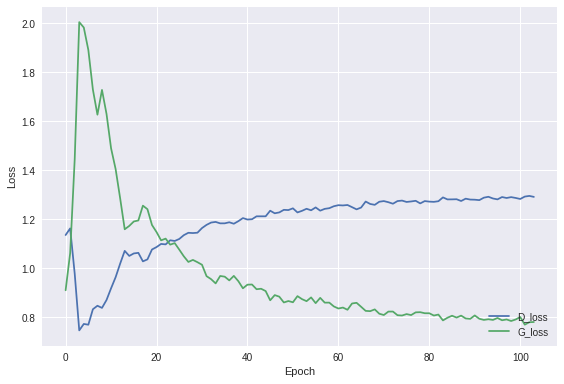

In [0]:
with open('MNIST_GAN_results/train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)
show_train_hist(train_hist, save=True, path='MNIST_GAN_results/MNIST_GAN_train_hist.png')
images = []
sess.close()

In [0]:
sess.close()

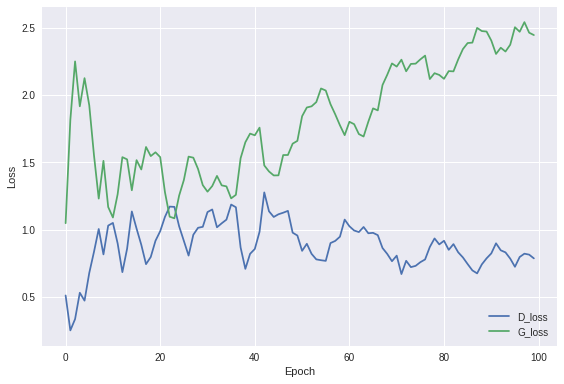

In [0]:
'''
<实验记录>
    第一次实验：
        Learning Rate:       lr = 0.0002
        Avg per epoch ptime: 19.81, total 100 epochs ptime: 7896.81
        loss_d变化:        
        
        drop_out:            初次试验并没有用到,在D中定义了,在'with variable_scope' of D中placeholder传入
        
'''


In [0]:
sess.close()